# **Data Collection Notebook**

## Objectives

* Fetch data from Kaggle and save as raw data

## Inputs

*   Kaggle JSON file - authentication token 

## Outputs

* Generate Dataset: inputs/datasets/malaria_dataset

## Additional Comments | Insights | Conclusions


* No comments


---

# Install and Import packages

In [ ]:
#Install kaggle package

In [ ]:
import numpy
import os

## Change the working directory

In [ ]:
current_dir = os.getcwd()
current_dir

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

In [ ]:

current_dir = os.getcwd()
current_dir

---

# Fecth data from Kaggle

---

You first need to download to your machine a j**son file (authentication token)** from Kaggle for authentication.


The process is:
  1. From the site header, click on your user profile picture, then on **“Account”** from the dropdown menu. This will take you to your account settings

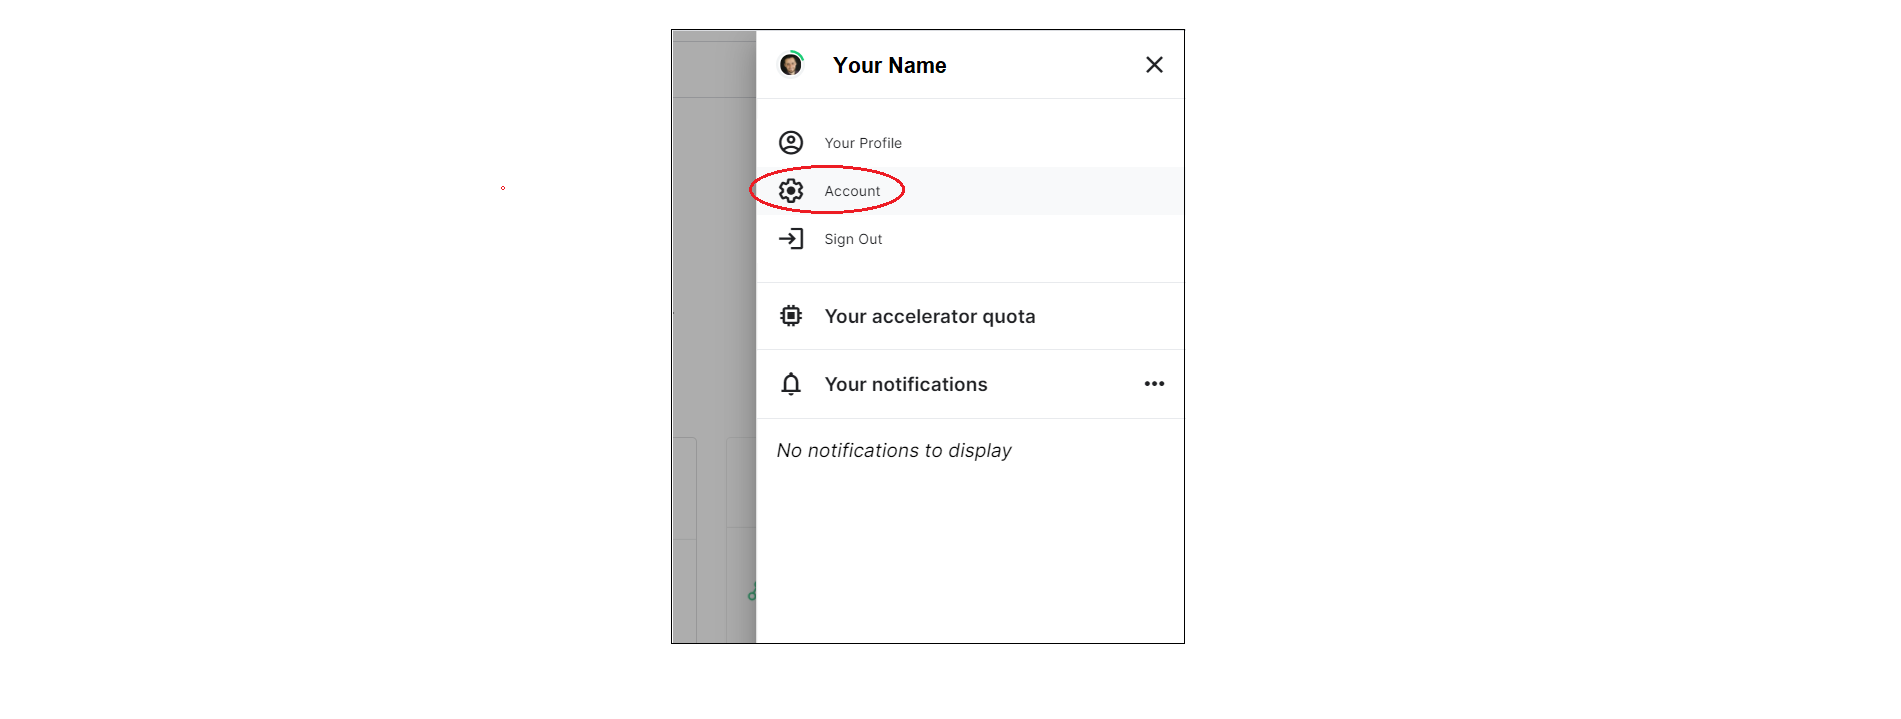

2. Scroll down to the section of the page called **API** 


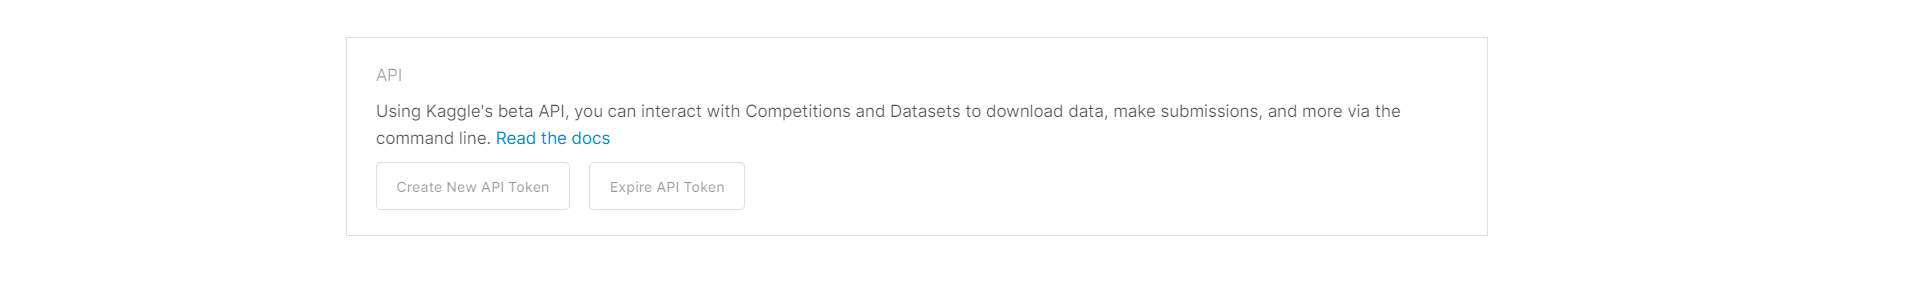

3. Click **Expire API Token** to remove previous tokens
4. To create a new token, click on the “**Create New API Token**” button. It will generate a fresh authentication token and will download **kaggle.json file** on your machine.

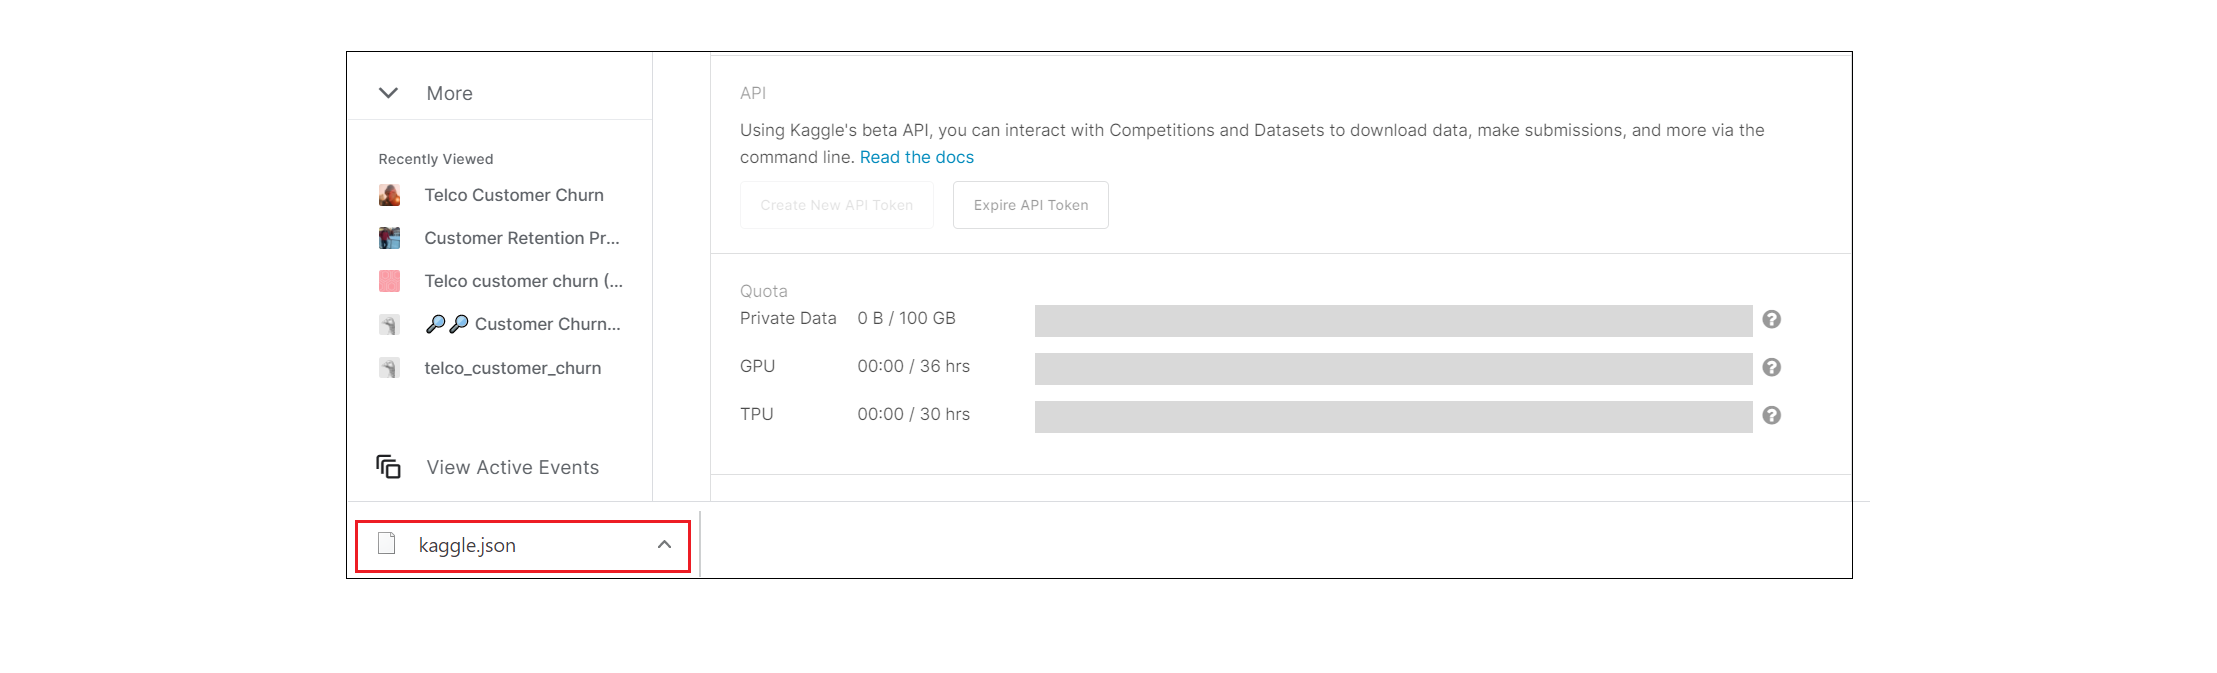

In case you find any difficulty, go to "Authentication" section in this [link](https://www.kaggle.com/docs/api).



* In the end, you should have this file saved locally in your machine. **Please make sure this file is named as kaggle.json**


---

Run the cell below **to change kaggle configuration directory to current working directory and permission of kaggle authentication json**

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

* Get the dataset path from the Kaggle url. When you are viewing the dataset at Kaggle, check what is after https://www.kaggle.com/ . You should copy that at KaggleDatasetPath.
* Set your destination folder.

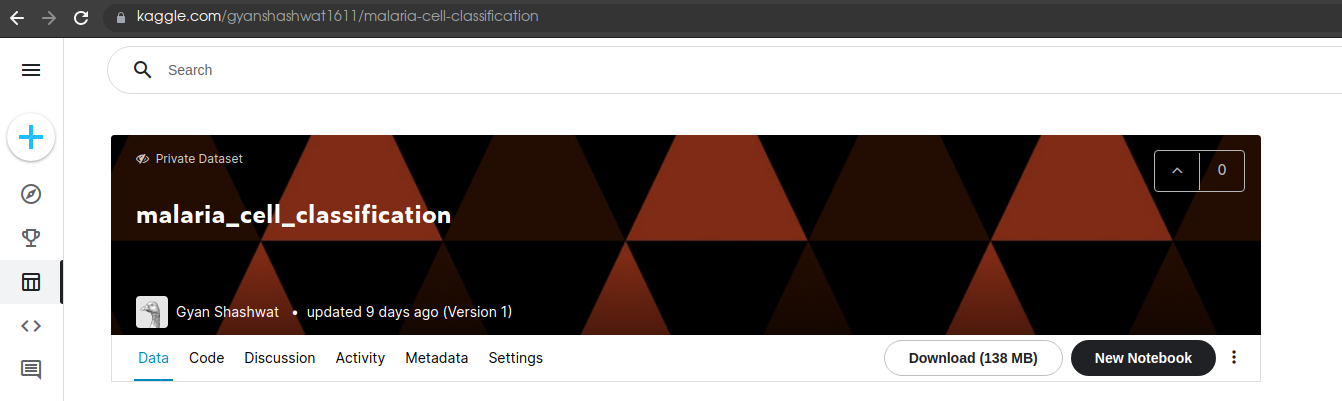

Set Kaggle Dataset and Download it

In [ ]:
KaggleDatasetPath = ""
DestinationFolder = "inputs/malaria_dataset"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Unzip the downloaded file, delete the zip file

In [ ]:
! unzip {DestinationFolder}/*.zip -d {DestinationFolder} \
  && rm {DestinationFolder}/*.zip

# Quick Data Exploration

## Delete extra set of images

Particularly in this dataset, an extra set of images comes in automatically. We will not need it, so we can delete

## Remove non image file

## Split train validation test set

In [ ]:
import os
import shutil
import random
import joblib

def split_train_validation_test_images(my_data_dir, train_set_ratio, validation_set_ratio, test_set_ratio):
  
  if train_set_ratio + validation_set_ratio + test_set_ratio != 1.0:
    print("train_set_ratio + validation_set_ratio + test_set_ratio should sum 1.0")
    return

  # gets classes labels
  labels = os.listdir(my_data_dir) # it should get only the folder name


  # create train, test folders with classess labels sub-folder
  for folder in ['train','validation','test']:
    for label in labels:
      os.makedirs(name=my_data_dir+ '/' + folder + '/' + label)

  for label in labels:

    files = os.listdir(my_data_dir + '/' + label)
    random.shuffle(files)

    train_set_files_qty = int(len(files) * train_set_ratio)
    validation_set_files_qty = int(len(files) * validation_set_ratio)

    count = 1
    for file_name in files:
      if count <= train_set_files_qty:
        # move given file to train set
        shutil.move(my_data_dir + '/' + label + '/' + file_name,
                    my_data_dir + '/train/' + label + '/' + file_name)
        

      elif count <= (train_set_files_qty + validation_set_files_qty ):
        # move given file to validation set
        shutil.move(my_data_dir + '/' + label + '/' + file_name,
                    my_data_dir + '/validation/' + label + '/' + file_name)

      else:
        # move given file to test set
        shutil.move(my_data_dir + '/' + label + '/' + file_name,
                my_data_dir + '/test/' +label + '/'+ file_name)
        
      count += 1

    os.rmdir(my_data_dir + '/' + label)
    

Since we are not using GPU for training the models, we will reduce the train set for 30% of the available data
* This decision is done for a learning context where the time needed to train the models will not be extensive and impractical for the project development
* However, for projects in the workplace you may consider the conventional rule of thumb for splitting train test set. 

In [ ]:
split_train_validation_test_images(my_data_dir = f"inputs/malaria_dataset/cell_images",
                        train_set_ratio = 0.7,
                        validation_set_ratio=0.1,
                        test_set_ratio=0.2
                        )

---

## Labels Exploration

Quik Data Exploration to check labels on train and test sets

In [ ]:
my_data_dir = f"inputs/malaria_dataset/cell_images"

labels_train = os.listdir(my_data_dir+ '/train')
labels_val = os.listdir(my_data_dir+ '/validation')
labels_test = os.listdir(my_data_dir+ '/test')
labels = list(set(labels_train + labels_test))

print(
    f"Labels on train set: {labels_train}\n"
    f"Labels on validation set: {labels_val}\n"
    f"Labels on test set: {labels_test}\n"
    f"Project Labels: {labels}"
    )

In [ ]:
pip install matplotlib

Check labels frequency across train and test set

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
df_freq = pd.DataFrame([]) 

for folder in ['train','validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")


plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.show()

# **Push** generated/new files from this Session to GitHub repo

You may push the images to the repo!

* Git status

* Git commit

* Git Push

---